<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
import numpy as np

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
test_data0 = iris['data'][:5,:]
test_data1 = iris['data'][50:55,:]
test_data2 = iris['data'][100:105,:]

train_data0 = iris['data'][5:50,:]
train_data1 = iris['data'][55:100,:]
train_data2 = iris['data'][105:150,:]

In [14]:
test_data = np.concatenate([test_data0,test_data1,test_data2])
train_data = np.concatenate([train_data0,train_data1,train_data2])

In [15]:
test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]

##HW4

Write your own KNN algorithn using sorting fuction from HW2



```
(the function should take 3 parameters:

1.training data

2.testdata

3.K)
```



In [18]:
def knn(train_data, train_label, test_data, k):
    predictions = []

    for i in range(len(test_data)):
        distances = []
        for j in range(len(train_data)):
            distance = np.sqrt(np.sum((test_data[i] - train_data[j]) ** 2))
            distances.append((train_label[j], distance))

        for m in range(k):
            min_distance = distances[m]
            min_index = m
            for n in range(m+1, len(distances)):
                if distances[n][1] < min_distance[1]:
                    min_distance = distances[n]
                    min_index = n
            distances[m], distances[min_index] = distances[min_index], distances[m]

        votes = {}
        for n in range(k):
            label = distances[n][0]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1

        prediction = max(votes, key=votes.get)
        predictions.append(prediction)

    return predictions

In [20]:
test_data = [test_data0, test_data1, test_data2]
test_labels = [test_label_0, test_label_1, test_label_2]
train_data = [train_data0, train_data1, train_data2]
train_labels = [train_label_0, train_label_1, train_label_2]

In [21]:
k = 3

In [23]:
import matplotlib.pyplot as plt

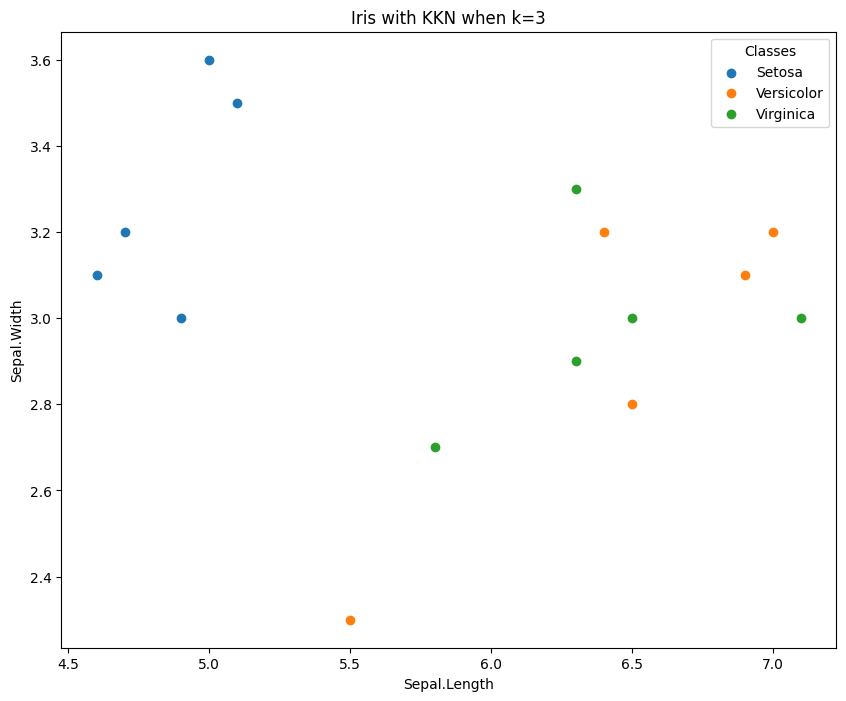

Predictions: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


In [26]:
predictions = []
for i in range(len(test_data)):
    predictions.extend(knn(train_data[i], train_labels[i], test_data[i], k))

plt.figure(figsize=(10, 8))


plt.scatter(test_data[0][:, 0], test_data[0][:, 1], label=f'Setosa')
plt.scatter(test_data[1][:, 0], test_data[1][:, 1], label=f'Versicolor')
plt.scatter(test_data[2][:, 0], test_data[2][:, 1], label=f'Virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend(title='Classes')

plt.title('Iris with KKN when k=3')
plt.show()

# Display the predictions
print("Predictions:", predictions)

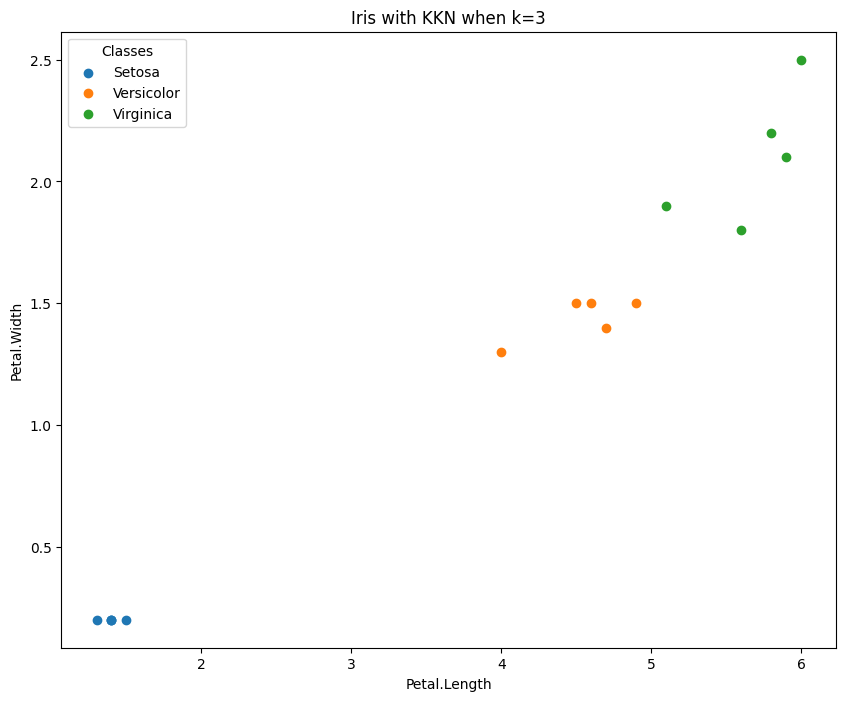

In [28]:
plt.figure(figsize=(10, 8))

plt.scatter(test_data[0][:, 2], test_data[0][:, 3], label=f'Setosa')
plt.scatter(test_data[1][:, 2], test_data[1][:, 3], label=f'Versicolor')
plt.scatter(test_data[2][:, 2], test_data[2][:, 3], label=f'Virginica')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(title='Classes')

plt.title('Iris with KKN when k=3')
plt.show()